In [104]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [105]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

h_vec = np.linspace(0.1,1.5,100) 

In [115]:
class question1:
    def __init__(self, rho, beta, gamma, w, b, delta, h_vec):
        self.rho = rho
        self.beta = beta
        self.gamma = gamma
        self.w = w
        self.b = b
        self.delta = delta
        self.h_vec = h_vec
        
    def consumption(self,l_t, h_t):
        if l_t==1:
            c_t=self.w*h_t*l_t
            
        if l_t==0:
            c_t=self.b
            
        return c_t
            
    def utility(self,l_t,h_t):
        u_t = self.consumption(l_t, h_t)**(1-self.rho)/(1-self.rho) - self.gamma*l_t
        
        return u_t
    
    def humancapital(self,h_t, l_t, prob):
        h_2 = h_t + l_t + prob*self.delta
        
        return h_2

    def period1(self,l_t,h_t):
        #expected humancapital
        h2 = 0.5 * self.humancapital(h_t, l_t, 1) + 0.5 * self.humancapital(h_t,l_t,0)
        
        #utility
        v1 = self.utility(l_t, h_t) + self.beta * self.utility(l_t,h2)
        
        return v1
    
    def period2(self, l_t, h_t):
        v2 = self.utility(l_t, h_t)
        
        return v2
    
    def solution(self, period):
        humancap = []
        optimallabour = []
        optimalutil = []
        workutil = []
        unemputil = []
        
        for h in self.h_vec:
            list = [period(0, h), period(1, h)]
            
            if list[1]>list[0]:
                optimallabour.append(1)
            else:
                optimallabour.append(0)
            
            optimalutil.append(max(list))
            workutil.append(list[1])
            unemputil.append(list[0])
            humancap.append(h)
        
        data = pd.DataFrame()
        data["h"]=humancap
        data["best l"]=optimallabour
        data["best u"]=optimalutil
        data["work u"]=workutil
        data["unemp u"]=unemputil
        
        return data

In [116]:
a = question1(rho,beta,gamma, w, b, Delta, h_vec)

In [117]:
data = a.solution(a.period1)

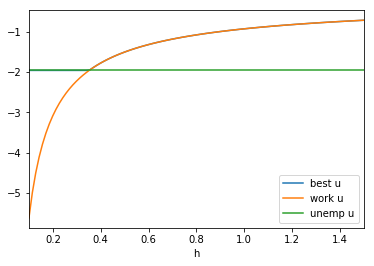